<h1 align='center'> Estimation of Obesity levels </h1>


In [37]:
# Data Manipulation
import numpy as np
import pandas as pd

# Visualization -This is where the graphs come in.
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn import tree, metrics
from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.cluster import KMeans

## 1. Loading Data

In [38]:
# Import and View the data.
df = pd.read_csv('Obesity.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


- Since our predictor variable is categorical here we shall create a new column to undestand a bit more about our Label. This column is called the Body Mass Index (BMI).

In [39]:
# Vucut Kutle Indeksi
df['BMI'] = df['Weight']/(df['Height']**2)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


## 2. Veri Analizi

In [40]:
# Veri Seti Boyutu
print(df.shape)
df.info()

(2111, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                    

In [41]:
# Ozellik Sayilari
df.count()

Gender                            2111
Age                               2111
Height                            2111
Weight                            2111
family_history_with_overweight    2111
FAVC                              2111
FCVC                              2111
NCP                               2111
CAEC                              2111
SMOKE                             2111
CH2O                              2111
SCC                               2111
FAF                               2111
TUE                               2111
CALC                              2111
MTRANS                            2111
NObeyesdad                        2111
BMI                               2111
dtype: int64

In [42]:
# object verileri sayisal ifadeye donustur
df.loc()[df['family_history_with_overweight']=='no','family_history_with_overweight']=0
df.loc()[df['family_history_with_overweight']=='yes','family_history_with_overweight']=1

df.loc()[df['FAVC']=='no','FAVC']=0
df.loc()[df['FAVC']=='yes','FAVC']=1

df.loc()[df['SMOKE']=='no','SMOKE']=0
df.loc()[df['SMOKE']=='yes','SMOKE']=1

df.loc()[df['SCC']=='no','SCC']=0
df.loc()[df['SCC']=='yes','SCC']=1

df.loc()[df['CAEC']=='No','CAEC']=1
df.loc()[df['CAEC']=='no','CAEC']=1
df.loc()[df['CAEC']=='Sometimes','CAEC']=2
df.loc()[df['CAEC']=='Frequently','CAEC']=3
df.loc()[df['CAEC']=='Always','CAEC']=4

df.loc()[df['CALC']=='no','CALC']=1
df.loc()[df['CALC']=='Sometimes','CALC']=2
df.loc()[df['CALC']=='Frequently','CALC']=3
df.loc()[df['CALC']=='Always','CALC']=4

df.loc()[df['Gender']=='Female','Gender']=0
df.loc()[df['Gender']=='Male','Gender']=1

df.loc()[df['MTRANS']=='Public_Transportation','MTRANS']=0
df.loc()[df['MTRANS']=='Walking','MTRANS']=1
df.loc()[df['MTRANS']=='Automobile','MTRANS']=2
df.loc()[df['MTRANS']=='Motorbike','MTRANS']=3
df.loc()[df['MTRANS']=='Bike','MTRANS']=4

df.loc()[df['NObeyesdad']=='Normal_Weight','NObeyesdad']=0
df.loc()[df['NObeyesdad']=='Obesity_Type_I','NObeyesdad']=1
df.loc()[df['NObeyesdad']=='Obesity_Type_II','NObeyesdad']=2

df.loc()[df['NObeyesdad']=='Obesity_Type_III','NObeyesdad']=3

df.loc()[df['NObeyesdad']=='Overweight_Level_I','NObeyesdad']=4
df.loc()[df['NObeyesdad']=='Overweight_Level_II','NObeyesdad']=5
df.loc()[df['NObeyesdad']=='Insufficient_Weight','NObeyesdad']=6



In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [44]:
df['family_history_with_overweight'] = pd.to_numeric(df['family_history_with_overweight'])
df['FAVC'] = pd.to_numeric(df['FAVC'])
df['SMOKE'] = pd.to_numeric(df['SMOKE'])
df['CAEC'] = pd.to_numeric(df['CAEC'])
df['CALC'] = pd.to_numeric(df['CALC'])
df['Gender'] = pd.to_numeric(df['Gender'])
df['MTRANS'] = pd.to_numeric(df['MTRANS'])
df['NObeyesdad'] = pd.to_numeric(df['NObeyesdad'])
df['SCC'] = pd.to_numeric(df['SCC'])


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int64  
 12  FAF                             21

In [46]:
# missing value larin yuzdesi
np.round(((df.isnull().sum())/len(df))*100,2)

Gender                            0.0
Age                               0.0
Height                            0.0
Weight                            0.0
family_history_with_overweight    0.0
FAVC                              0.0
FCVC                              0.0
NCP                               0.0
CAEC                              0.0
SMOKE                             0.0
CH2O                              0.0
SCC                               0.0
FAF                               0.0
TUE                               0.0
CALC                              0.0
MTRANS                            0.0
NObeyesdad                        0.0
BMI                               0.0
dtype: float64

In [47]:
X = df.drop('NObeyesdad',axis=1)
y = df['NObeyesdad']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 33)

## 3. Makine Ogrenmesi Modelleri

### i. Decision tree

In [49]:
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train, y_train)
y_predict = dt_clf.predict(X_test)

In [50]:
#Accuracy evaluation
accuracy = metrics.accuracy_score(y_train, dt_clf.predict(X_train))
print("Train set Accuracy: ", accuracy)
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_predict))

Train set Accuracy:  1.0
Test set Accuracy:  0.9763593380614657


In [51]:
cm=confusion_matrix(y_train,dt_clf.predict(X_train))
print('Train Confusion Matrix: \n', cm)

Train Confusion Matrix: 
 [[235   0   0   0   0   0   0]
 [  0 270   0   0   0   0   0]
 [  0   0 249   0   0   0   0]
 [  0   0   0 256   0   0   0]
 [  0   0   0   0 232   0   0]
 [  0   0   0   0   0 229   0]
 [  0   0   0   0   0   0 217]]


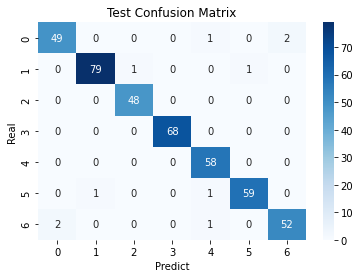

In [52]:
cmdt = confusion_matrix(y_test, y_predict)
sns.heatmap(cmdt,annot=True,fmt='g',cmap="Blues")
plt.title("Test Confusion Matrix")
plt.xlabel("Predict")
plt.ylabel("Real")
plt.show()

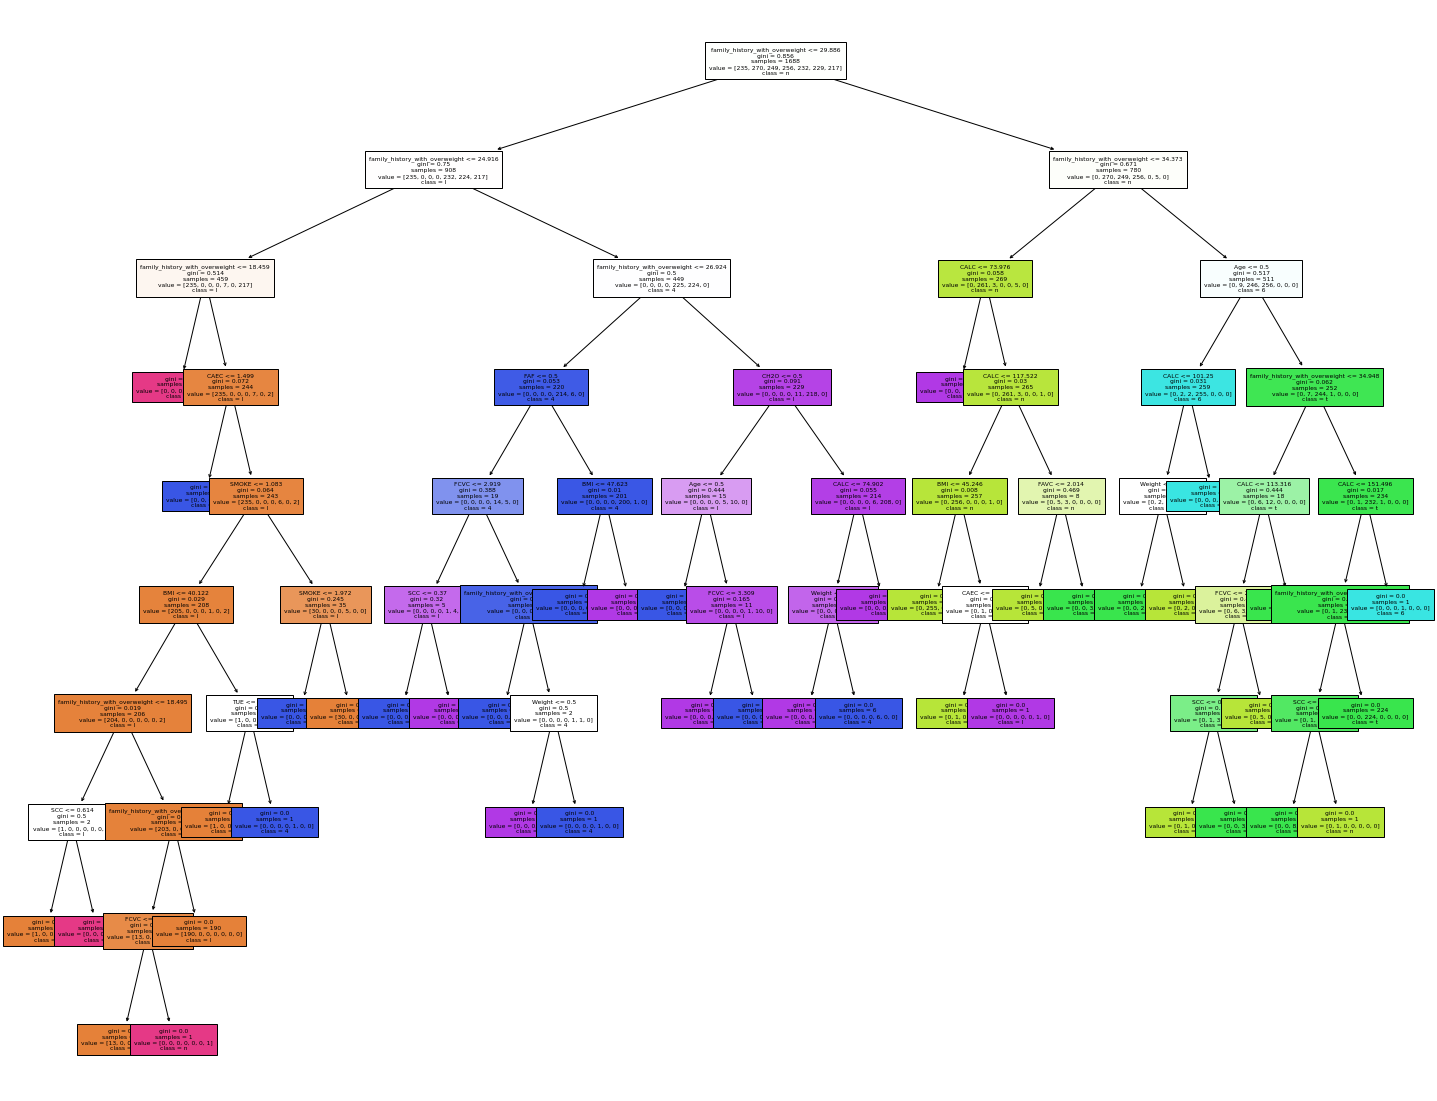

In [53]:
from sklearn import tree
y,class_names = pd.factorize(y)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_clf, 
                   feature_names=['Age', 'BMI', 'CAEC', 'CALC', 'CH2O', 'FAF', 'FAVC', 'FCVC', 'Gender', 'Height', 'MTRANS', 'NCP', 'SCC', 'SMOKE', 'TUE', 'Weight', 'family_history_with_overweight'],
                   class_names=str(class_names),
                   filled=True,
                   fontsize=6
                   )

### ii. Support Vector Machine

In [54]:
svm_clf = svm.SVC()
svm_clf = svm_clf.fit(X_train, y_train)

svm_train_score=svm_clf.score(X_train,y_train)
svm_test_score=svm_clf.score(X_test,y_test)

print(f"Train score: {svm_train_score}")
print(f"Test score: {svm_test_score}")

Train score: 0.7411137440758294
Test score: 0.7588652482269503


In [55]:
svm_cv_scores = cross_val_score(svm_clf, X_train, y_train, cv=5)
svm_clf_predictions = svm_clf.predict(X_test)

print('Accuracy scores for the 5 folds: ', svm_cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(svm_cv_scores)))

Accuracy scores for the 5 folds:  [0.67751479 0.73076923 0.72485207 0.71513353 0.71513353]
Mean cross validation score: 0.713


In [56]:
cm=confusion_matrix(y_train,svm_clf.predict(X_train))
print('Train Confusion Matrix: \n', cm)

Train Confusion Matrix: 
 [[125   0   0   0  52   3  55]
 [  0 153  23   0   0  94   0]
 [  0  15 224  10   0   0   0]
 [  0   0  16 240   0   0   0]
 [ 31   0   0   0 141  60   0]
 [  2  19   0   0  51 157   0]
 [  6   0   0   0   0   0 211]]


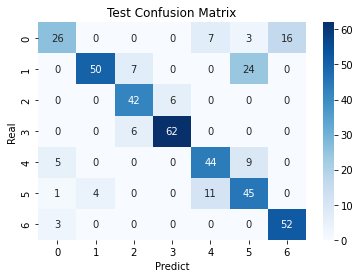

In [57]:
cmdt = confusion_matrix(y_test, svm_clf_predictions)
sns.heatmap(cmdt,annot=True,fmt='g',cmap="Blues")
plt.title("Test Confusion Matrix")
plt.xlabel("Predict")
plt.ylabel("Real")
plt.show()

### iii. K-Means

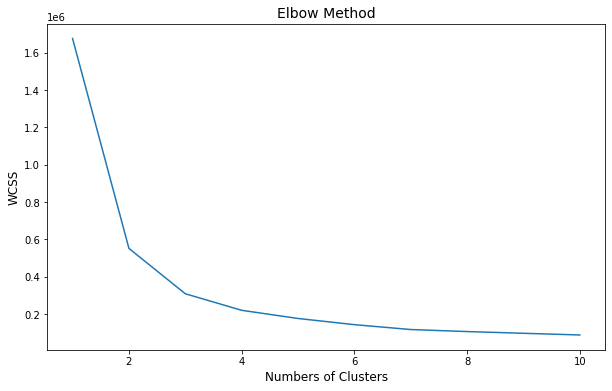

In [58]:
# Elbow Method: is use to find out the number of clusters in K-means
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (10,6))
plt.plot(range(1,11), wcss)
plt.xlabel('Numbers of Clusters', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
plt.title('Elbow Method', fontsize=14)
plt.show()

In [59]:
# Grafikten 7 sınıf oldugu goruluyor
kmeans = KMeans(init="k-means++", n_clusters=7, n_init=10, max_iter=300, random_state=42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)


[1 4 2 ... 3 3 3]


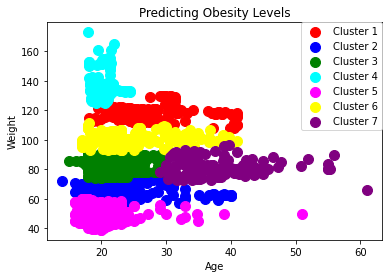

In [60]:
W=df.iloc[:, [1,3]].values
plt.scatter(W[y_kmeans==0, 0], W[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(W[y_kmeans==1, 0], W[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(W[y_kmeans==2, 0], W[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(W[y_kmeans==3, 0], W[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(W[y_kmeans==4, 0], W[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.scatter(W[y_kmeans==5, 0], W[y_kmeans==5, 1], s=100, c='yellow', label ='Cluster 6')
plt.scatter(W[y_kmeans==6, 0], W[y_kmeans==6, 1], s=100, c='purple', label ='Cluster 7')
plt.title('Predicting Obesity Levels')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.legend(bbox_to_anchor=(1, 1),borderaxespad=0)
plt.show()